# Portfolio Optimization of Volatile Assets (with Python)

Portfolio optimization in finance is the technique of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

# Section 1: Getting started

## 1. What is a portfolio?

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

For example, if you have investments in 3 companies, say, Google, Amazon and Tesla, then these 3 companies make up your investment portfolio.

But how do you invest in a company? You do so by purchasing assets of that company.

__What are assets, returns and risk?__

Assets are of various kinds. An asset is what you would purchase if you want to invest in a company.

These include, but are not limited to:

- Bonds
- Stocks
- Cash
- Real Estate
  
Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call returns.

For example, you will get returns from stocks when it’s market value goes up and similarly you will get returns from cash in form of interest.

But what if the company whose stocks you have purchased goes bankrupt?

This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called __risk of investment.__

Another aspect of risk is the _fluctuations_ in the asset value. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.

A good portfolio is one which gives us __maximum return on our investment for minimum risk__, as discussed earlier.

The next question is, how do we decide out of an infinite possible combinations for portfolios, the one which is optimum?

## 2. Modern Portfolio Theory (MPT)

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.
So, what is the MPT all about?

MPT encourages diversification of assets. __It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.__

This is the crux of the __Modern Portfolio Theory (MPT)__

## 3. What is Efficient Frontier?

We know every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Likewise, there can be multiple portfolios that give lowest risk for a pre-defined expected return.

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

We will revisit this with an example again.

Now that you understand the term of portfolio optimization, let’s see how its actually implemented.

# SECTION 2: Understanding with simpler example

## 4. Data Pull
There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.
We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

__Step 1:__ Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [14]:
# !pip install pandas-datareader
# !pip install yfinance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import the data

In [15]:
import yfinance as yf
data = yf.download(['TSLA', 'MSFT'], 
                   start = '2018-01-01', 
                   end='2019-12-31')
data.head()

[*********************100%%**********************]  2 of 2 completed


Price       Adj Close                 Close                  High             \
Ticker           MSFT       TSLA       MSFT       TSLA       MSFT       TSLA   
Date                                                                           
2018-01-02  80.080902  21.368668  85.949997  21.368668  86.309998  21.474001   
2018-01-03  80.453613  21.150000  86.349998  21.150000  86.510002  21.683332   
2018-01-04  81.161705  20.974667  87.110001  20.974667  87.660004  21.236668   
2018-01-05  82.167976  21.105333  88.190002  21.105333  88.410004  21.149332   
2018-01-08  82.251816  22.427334  88.279999  22.427334  88.580002  22.468000   

Price             Low                  Open               Volume             
Ticker           MSFT       TSLA       MSFT       TSLA      MSFT       TSLA  
Date                                                                         
2018-01-02  85.500000  20.733334  86.129997  20.799999  22483800   65283000  
2018-01-03  85.970001  21.036667  86.059998  21.400000  26061400   67822500  
2018-01-04  86.570000  20.378668  86.589996  20.858000  21912000  149194500  
2018-01-05  87.430000  20.799999  87.660004  21.108000  23407100   68868000  
2018-01-08  87.599998  21.033333  88.199997  21.066668  22113000  147891000

__Keep only 'Adj Close'__

In [16]:
data = data['Adj Close']
data.head()

Ticker,MSFT,TSLA
Date,,
2018-01-02,80.080902,21.368668
2018-01-03,80.453613,21.150000
2018-01-04,81.161705,20.974667
2018-01-05,82.167976,21.105333
2018-01-08,82.251816,22.427334


## 5. Why Log of Perct Change?

Calculate percentage change in stock prices

Next, we calculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.

But take log?

The reason for this is that log of the returns is time additive.


That is,

If r13 is the returns for time between t3 and t1.

- r12 is the returns between t1 a- nd t2 and
- r23 is the returns between t2 and t3.

Then, log(r13) = log(r12) + log(r23)

For example:

If p1 = 100, p2 = 110 and p3 = 120,
where p1 is price of stock in time 1

Then:

log(r12) = ln(p2/p1) = `ln`(110/100) = 9.53%,

log(r23) = `ln`(120/110) = 8.7% and

log(r13) = log(r12) + log(r23) = 9.53 + 8.7 = 18.23%, which` is same as ln(120/100).

This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true if you simply compute percentage change.

It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.

In [17]:
# Log of percentage change
tesla = data['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [18]:
# Variance
var_tesla = tesla.var()
var_tesla

0.001150535895973198

__Similarly for MSFT__


In [20]:
# Log of Percentage change for Facebook
msft = data['MSFT'].pct_change().apply(lambda x: np.log(1+x))
msft.head()

Date
2018-01-02         NaN
2018-01-03    0.004643
2018-01-04    0.008763
2018-01-05    0.012322
2018-01-08    0.001020
Name: MSFT, dtype: float64

## 6. Variance, Volatility

__Variance__

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

<img src="variance_formula.png" height=100 width=300>

In [21]:
# Variance
var_msft = msft.var()
var_msft

0.00023668967248844836

__Volatility__


Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of varianc


But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.e.

In [23]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
msft_vol = np.sqrt(var_msft * 250)
tesla_vol, msft_vol

(0.5363151815801036, 0.2432538141984871)

__Plot volatility__

<Axes: xlabel='Ticker'>

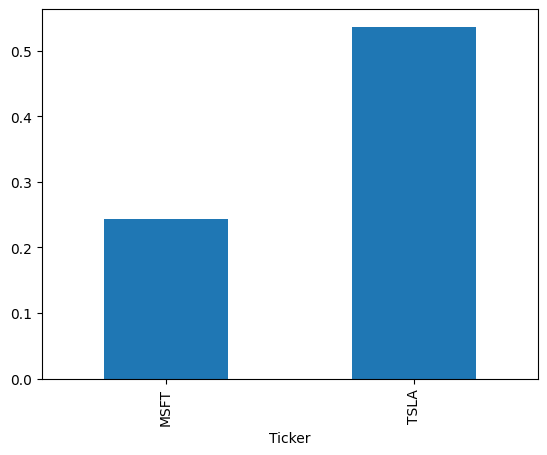

In [24]:
# Volatility of both stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

__Covariance__

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [26]:
# Log of Percentage change
data_pctchg = data.pct_change().apply(lambda x: np.log(1+x))
data_pctchg.head()

Ticker,MSFT,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.004643,-0.010286
2018-01-04,0.008763,-0.008325
2018-01-05,0.012322,0.006210
2018-01-08,0.001020,0.060755


In [27]:
# Covariance
data_pctchg['TSLA'].cov(data_pctchg['MSFT'])

0.00018278323407414524

__Correlation__

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.
This is calculated using the .corr() function.

In [28]:
data_pctchg['TSLA'].corr(data_pctchg['MSFT'])

0.35026489800209337


## 7. Expected Returns

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

First, let’s compute the log of percentage change.

In [30]:
data_pctchg = data.pct_change().apply(lambda x: np.log(1+x))
data_pctchg.head()

Ticker,MSFT,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.004643,-0.010286
2018-01-04,0.008763,-0.008325
2018-01-05,0.012322,0.006210
2018-01-08,0.001020,0.060755


## Weights

Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [31]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = data_pctchg.mean()
e_r_ind

Ticker
MSFT    0.001274
TSLA    0.000514
dtype: float64

The total expected return for a portfolio is given by:

$$E(R_p) = w_1*E(R_1) + w_2*E(R_2) + . . + w_n*E(R_n)$$

__Total Expected Returns__ for the assigned weights.


In [32]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.0006660239651115509

# SECTION 3: Building Optimal Portfolio

## 8. Problem Statement

Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

What is the optimal allocation between these assets?

Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

In [36]:
# Import data\
df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 
                start='2015-01-01', end='2019-12-31')
df.head()

[*********************100%%**********************]  4 of 4 completed


Price       Adj Close                                     Close           \
Ticker           AAPL     AMZN      GOOGL        NKE       AAPL     AMZN   
Date                                                                       
2015-01-02  24.435265  15.4260  26.477501  42.926769  27.332500  15.4260   
2015-01-05  23.746883  15.1095  25.973000  42.235634  26.562500  15.1095   
2015-01-06  23.749126  14.7645  25.332001  41.987194  26.565001  14.7645   
2015-01-07  24.082138  14.9210  25.257500  42.854477  26.937500  14.9210   
2015-01-08  25.007433  15.0230  25.345501  43.843750  27.972500  15.0230   

Price                                  High           ...        Low  \
Ticker          GOOGL        NKE       AAPL     AMZN  ...      GOOGL   
Date                                                  ...              
2015-01-02  26.477501  47.514999  27.860001  15.7375  ...  26.393999   
2015-01-05  25.973000  46.750000  27.162500  15.4190  ...  25.887501   
2015-01-06  25.332001  46.474998  26.857500  15.1500  ...  25.277500   
2015-01-07  25.257500  47.435001  27.049999  15.0640  ...  25.182501   
2015-01-08  25.345501  48.529999  28.037500  15.1570  ...  24.750999   

Price                       Open                                    Volume  \
Ticker            NKE       AAPL     AMZN      GOOGL        NKE       AAPL   
Date                                                                         
2015-01-02  47.055000  27.847500  15.6290  26.629999  48.275002  212818400   
2015-01-05  46.564999  27.072500  15.3505  26.357500  47.255001  257142000   
2015-01-06  46.035000  26.635000  15.1120  26.025000  46.945000  263188400   
2015-01-07  46.549999  26.799999  14.8750  25.547501  46.805000  160423600   
2015-01-08  47.810001  27.307501  15.0160  25.075500  47.830002  237458000   

Price                                    
Ticker          AMZN     GOOGL      NKE  
Date                                     
2015-01-02  55664000  26480000  4985800  
2015-01-05  55484000  41182000  6889200  
2015-01-06  70380000  54456000  7576000  
2015-01-07  52806000  46918000  7256000  
2015-01-08  61768000  73054000  5978200  

[5 rows x 24 columns]

Keep only 'Adj Close'

In [37]:
df = df['Adj Close']
df.head()

Ticker,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.435265,15.4260,26.477501,42.926769
2015-01-05,23.746883,15.1095,25.973000,42.235634
2015-01-06,23.749126,14.7645,25.332001,41.987194
2015-01-07,24.082138,14.9210,25.257500,42.854477
2015-01-08,25.007433,15.0230,25.345501,43.843750


## 9. Covariance and Correlation Matrix


The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [38]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,0.000246,0.000142,0.000122,0.000084
AMZN,0.000142,0.000334,0.000176,0.000092
GOOGL,0.000122,0.000176,0.000222,0.000085
NKE,0.000084,0.000092,0.000085,0.000219


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [39]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,1.000000,0.496660,0.524875,0.360850
AMZN,0.496660,1.000000,0.647941,0.341554
GOOGL,0.524875,0.647941,1.000000,0.387465
NKE,0.360850,0.341554,0.387465,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## 10. Portfolio Variance

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$$\Sigma^2(Rp) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j)$$


Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [40]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 
     'NKE': 0.2, 
     'GOOGL': 0.5, 
     'AMZN': 0.2}

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0001609212538451515

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

## 11. Portfolio expected returns

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [41]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er


Ticker
AAPL     0.357854
AMZN     0.295745
GOOGL    0.155478
NKE      0.160666
dtype: float64

Portfolio returns

In [42]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.2048065393930699

## 12. The Efficient Frontier


This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

The plot of efficient frontier looks something like thi
s:


<img src="efficient_frontier.png" height=400 width=400>

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [43]:
# Volatility is given by the annual standard deviation. 
# We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL     0.247871
AMZN     0.288770
GOOGL    0.235375
NKE      0.233916
dtype: float64

In [44]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
AAPL,0.357854,0.247871
AMZN,0.295745,0.288770
GOOGL,0.155478,0.235375
NKE,0.160666,0.233916


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.
We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [45]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [46]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [47]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [48]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,NKE weight
0,0.203200,0.195946,0.068564,0.220411,0.146210,0.564815
1,0.271203,0.205275,0.308774,0.372919,0.139366,0.178942
2,0.259998,0.200600,0.267219,0.350543,0.137102,0.245137
3,0.226326,0.219523,0.037168,0.446669,0.386340,0.129823
4,0.220031,0.190068,0.201970,0.150151,0.143175,0.504703


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

<Axes: xlabel='Volatility', ylabel='Returns'>

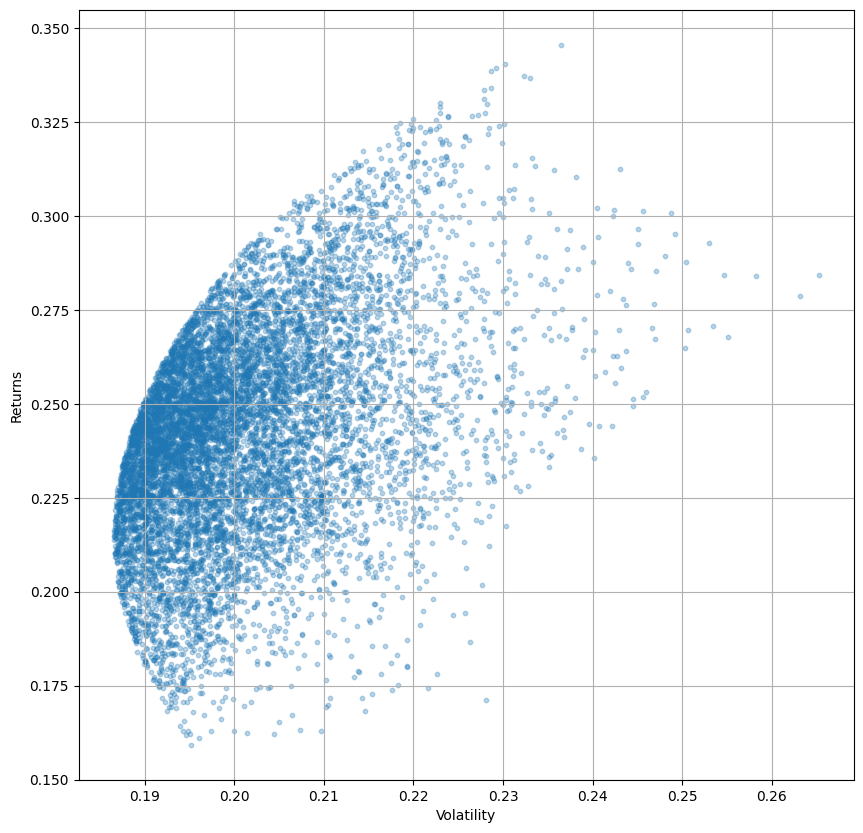

In [49]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', 
                        marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

__How to read the Efficient Frontier?__

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinatio point)


1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [50]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.214730
Volatility      0.186575
AAPL weight     0.255644
AMZN weight     0.038495
GOOGL weight    0.297927
NKE weight      0.407934
Name: 2964, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 41%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

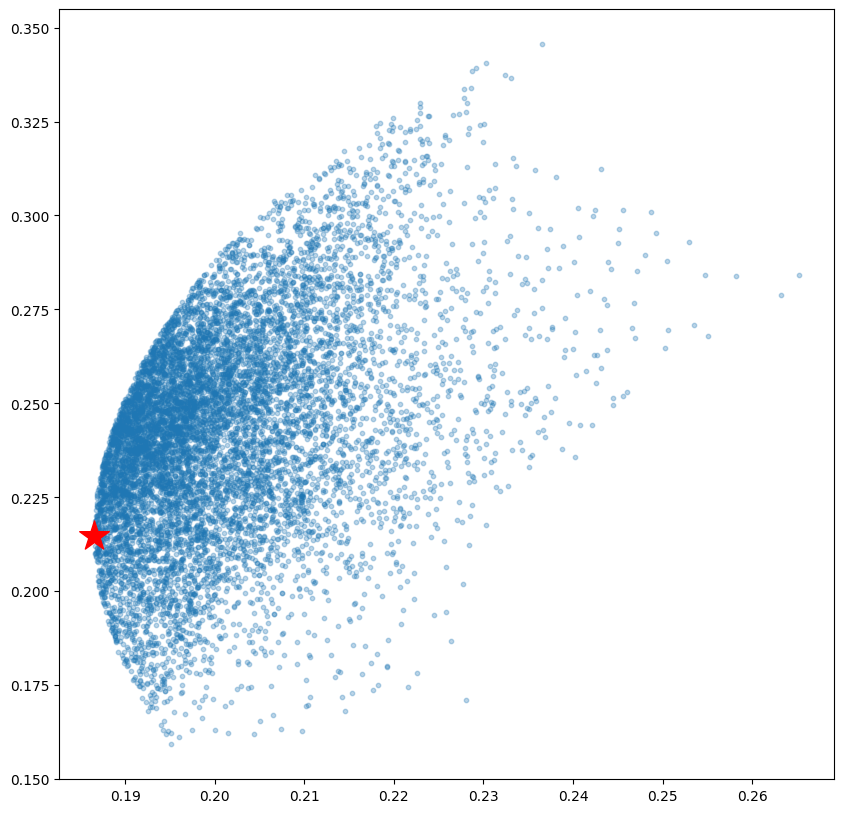

In [51]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter cal__led the Sharp__e Ratio.

## 14. Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

<img src="Sharpe-Ratio.jpg" height=200 width=200>

Below is the code for finding out portfolio with maximum Sharpe Ratio. This portfolio is the optimized portfolio that we wanted to find. We define the risk-free rate to be 1% or 0.01.

## 15. Optimal Risky Portfolio

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.


In [53]:
# Finding the optimal portfolio
rf = 0.01 # riskfree factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.324633
Volatility      0.218477
AAPL weight     0.689449
AMZN weight     0.207899
GOOGL weight    0.012990
NKE weight      0.089662
Name: 3943, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.



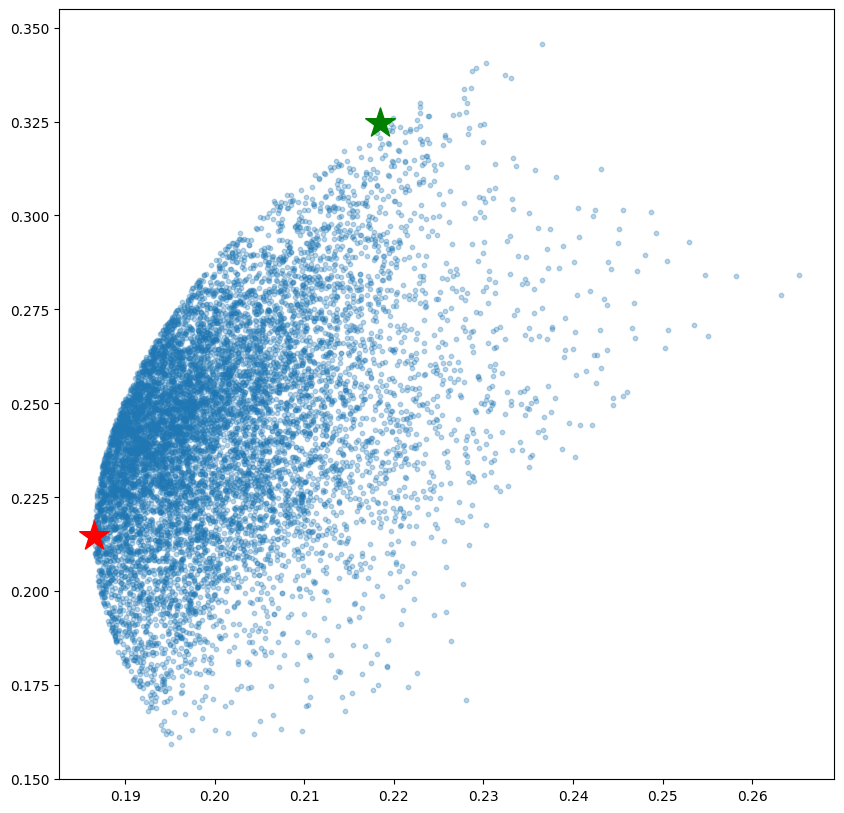

In [55]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.